In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('kaggle\\input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside the current session

kaggle\input\data_description.txt
kaggle\input\sample_submission.csv
kaggle\input\test.csv
kaggle\input\train.csv


In [2]:
df = pd.read_csv('kaggle/input/train.csv')
df_test = pd.read_csv('kaggle/input/test.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

In [4]:
df_test.shape

(1459, 80)

In [5]:

# Load your dataset (replace with actual file)
# Check data types
print(df.dtypes)


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [6]:
# Count boolean features
bool_count = sum(df.dtypes == 'bool')

print(f"Number of boolean features: {bool_count}")

Number of boolean features: 0


In [7]:
import pandas as pd

# Load your dataset (replace with actual file)

# Count NaN values per feature
nan_counts = df.isna().sum()

# Display NaN counts
print(nan_counts)
print("----------------------------")
print(nan_counts[nan_counts > 0])


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
----------------------------
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [8]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)        
pd.set_option('display.expand_frame_repr', False)

In [9]:
from sklearn.model_selection import train_test_split

X_train = df.drop(columns=['SalePrice'])
y_train = df['SalePrice'].to_frame()
X_test = df_test


In [10]:
y_train.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [11]:
X_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
y_train["SalePrice_normalized"] = scaler.fit_transform(y_train[['SalePrice']])

y_train["SalePrice_normalized"].median()


np.float64(0.1778919594500764)

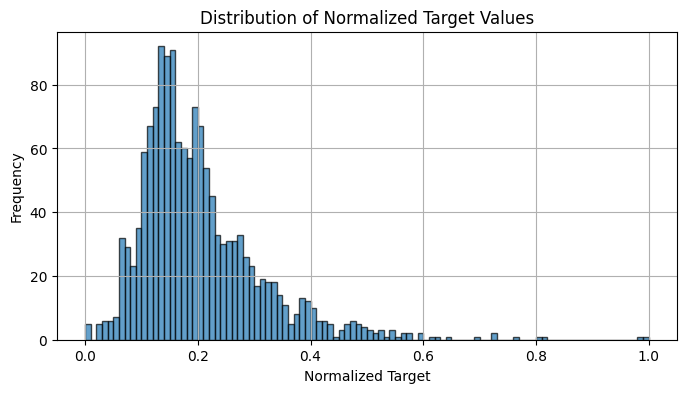

In [13]:
import matplotlib.pyplot as plt
# Plot the histogram
plt.figure(figsize=(8, 4))
plt.hist(y_train['SalePrice_normalized'], bins=100, edgecolor='black', alpha=0.7)
plt.xlabel('Normalized Target')
plt.ylabel('Frequency')
plt.title('Distribution of Normalized Target Values')
plt.grid(True)
plt.show()

In [14]:
X_train.shape

(1460, 80)

In [15]:
X_train.isna().mean()

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
                   ...   
MiscVal          0.000000
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
Length: 80, dtype: float64

In [16]:
train_ids = X_train.pop('Id')

In [17]:
test_ids = X_test.pop('Id')


In [18]:
print(f"{X_train.shape}  and {X_test.shape} ")

(1460, 79)  and (1459, 79) 


In [19]:
cat_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']
num_cols = [col for col in X_train.columns if X_train[col].dtype != 'object']

print(f"Categorical columns ({len(cat_cols)}): {cat_cols}")
print(f"Numerical columns ({len(num_cols)}): {num_cols}")

Categorical columns (43): ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Numerical columns (36): ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 

In [20]:
X_train.loc[:, cat_cols] = X_train[cat_cols].fillna('Unknown')
X_test.loc[:, cat_cols] = X_test[cat_cols].fillna('Unknown')
X_train.loc[:, num_cols] = X_train.fillna(X_train[num_cols].mean())
X_test.loc[:, num_cols] = X_test.fillna(X_train[num_cols].mean())

# X_train['category_column'].fillna(X_train['category_column'].mode()[0], inplace=True)
# X_test['category_column'].fillna(X_train['category_column'].mode()[0], inplace=True)


In [21]:
for col in cat_cols:
    print(X_train[col].value_counts())

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
Street
Pave    1454
Grvl       6
Name: count, dtype: int64
Alley
Unknown    1369
Grvl         50
Pave         41
Name: count, dtype: int64
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17

In [22]:
X_train[cat_cols].nunique()

MSZoning          5
Street            2
Alley             3
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          5
BsmtCond          5
BsmtExposure      5
BsmtFinType1      7
BsmtFinType2      7
Heating           6
HeatingQC         5
CentralAir        2
Electrical        6
KitchenQual       4
Functional        7
FireplaceQu       6
GarageType        7
GarageFinish      4
GarageQual        6
GarageCond        6
PavedDrive        3
PoolQC            4
Fence             5
MiscFeature       5
SaleType          9
SaleCondition     6
dtype: int64

In [23]:
def remove_outliers_iqr(df, y=None, drop_threshold=1, threshold=2):
    """
    Remove rows with outliers based on the IQR method.

    Parameters:
    df (pd.DataFrame): The input feature DataFrame (X).
    y (pd.Series or pd.DataFrame, optional): The target variable(s) corresponding to df.
    drop_threshold (int): Number of outlier features required to drop a row.
    threshold (float): The IQR multiplier (default 1.5).

    Returns:
    pd.DataFrame: DataFrame with outliers removed.
    (Optional) pd.Series or pd.DataFrame: y with corresponding rows removed.
    """
    df_clean = df.copy()
    
    y_clean = y.copy() if y is not None else None  # Copy y if provided
    df["SalePrice"] = y_clean["SalePrice"]
    # Select only numerical columns
    num_cols = df_clean.select_dtypes(include=['number']).columns

    # Create a mask for rows to keep
    outlier_mask = np.zeros(df_clean.shape[0], dtype=int)

    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Identify rows where the column has an outlier
        is_outlier = (df[col] < lower_bound) | (df[col] > upper_bound)
        
        # Count outliers per row
        outlier_mask += is_outlier.astype(int)
        print(f"{col}: {is_outlier.sum()} outliers")

    # Identify rows to drop
    rows_to_drop = outlier_mask >= drop_threshold

    # Drop rows in X
    df_clean = df_clean[~rows_to_drop].copy()

    # Drop corresponding rows in y if provided
    if y_clean is not None:
        y_clean = y_clean[~rows_to_drop].copy()
        print(f"Total rows removed (X and y): {sum(rows_to_drop)}")
        return df_clean, y_clean

    print(f"Total rows removed: {sum(rows_to_drop)}")
    return df_clean


In [24]:
print(X_train.shape)
X_train_new, y_train_new = remove_outliers_iqr(X_train, y_train, drop_threshold=3)
print(X_train_new.shape)

(1460, 79)
MSSubClass: 40 outliers
LotFrontage: 62 outliers
LotArea: 54 outliers
OverallQual: 0 outliers
OverallCond: 28 outliers
YearBuilt: 0 outliers
YearRemodAdd: 0 outliers
MasVnrArea: 58 outliers
BsmtFinSF1: 3 outliers
BsmtFinSF2: 167 outliers
BsmtUnfSF: 6 outliers
TotalBsmtSF: 11 outliers
1stFlrSF: 9 outliers
2ndFlrSF: 0 outliers
LowQualFinSF: 26 outliers
GrLivArea: 18 outliers
BsmtFullBath: 0 outliers
BsmtHalfBath: 82 outliers
FullBath: 0 outliers
HalfBath: 0 outliers
BedroomAbvGr: 8 outliers
KitchenAbvGr: 68 outliers
TotRmsAbvGrd: 12 outliers
Fireplaces: 0 outliers
GarageYrBlt: 0 outliers
GarageCars: 0 outliers
GarageArea: 8 outliers
WoodDeckSF: 15 outliers
OpenPorchSF: 52 outliers
EnclosedPorch: 208 outliers
3SsnPorch: 24 outliers
ScreenPorch: 116 outliers
PoolArea: 7 outliers
MiscVal: 52 outliers
MoSold: 0 outliers
YrSold: 0 outliers
Total rows removed (X and y): 76
(1384, 79)


In [25]:
X_train = X_train_new
y_train = y_train_new

In [26]:
X_train.isna().mean()


MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
                ... 
MiscVal          0.0
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
Length: 79, dtype: float64

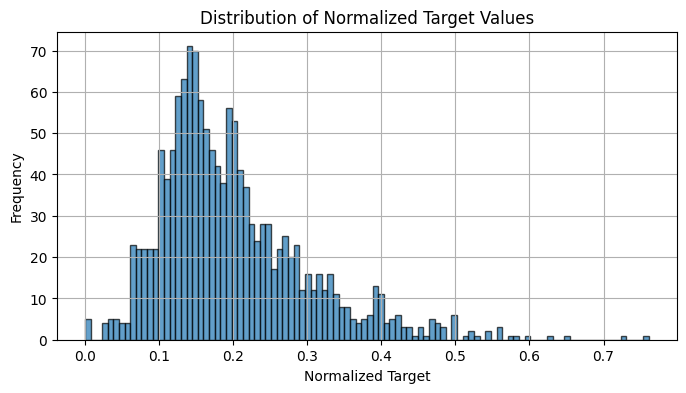

In [27]:
import matplotlib.pyplot as plt
# Plot the histogram
plt.figure(figsize=(8, 4))
plt.hist(y_train['SalePrice_normalized'], bins=100, edgecolor='black', alpha=0.7)
plt.xlabel('Normalized Target')
plt.ylabel('Frequency')
plt.title('Distribution of Normalized Target Values')
plt.grid(True)
plt.show()

In [28]:
from sklearn.model_selection import KFold
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np

class CustomPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, kfold_cols, one_hot_cols, n_splits=5, smoothing=4):
        self.kfold_columns = kfold_cols  # Columns to preprocess using K-Fold Target Encoding
        self.one_hot_columns = one_hot_cols  # Columns for One-Hot Encoding
        self.n_splits = n_splits
        self.smoothing = smoothing
        self.kfold_mappings = {}
        self.global_means = {}

    def fit(self, X, y):
        kf = KFold(n_splits=self.n_splits, shuffle=True, random_state=42)
        X_temp = X.copy()
        # X_temp['SalePrice'] = y
        X_temp['SalePrice_normalized'] = y_train["SalePrice_normalized"]
        
        for col in self.kfold_columns:
            global_mean = X_temp['SalePrice_normalized'].mean()
            self.global_means[col] = global_mean
            self.kfold_mappings[col] = {}
            print(f"Processing {col}...")
            
            for train_idx, val_idx in kf.split(X_temp):
                train_fold, val_fold = X_temp.iloc[train_idx], X_temp.iloc[val_idx]
                
                category_means = train_fold.groupby(col)['SalePrice_normalized'].mean()
                category_counts = train_fold.groupby(col)['SalePrice_normalized'].count()
                
                smoothed_means = (category_means * category_counts + global_mean * self.smoothing) / (category_counts + self.smoothing)
                
                self.kfold_mappings[col].update(smoothed_means.to_dict())
                
                print(f"Updated mappings for {col}: {self.kfold_mappings[col]}")
        
        return self
    
    def transform(self, X):
        X_transformed = X.copy()
        
        # Apply K-Fold Target Encoding
        print("Applying K-Fold Target Encoding...")
        for col in self.kfold_columns:
            X_transformed[f'{col}_encoded'] = X_transformed[col].map(self.kfold_mappings[col]).fillna(self.global_means[col])
            print(f"Missing values for {col} before filling: {X_transformed[f'{col}_encoded'].isna().sum()}")
            X_transformed.drop(columns=[col], inplace=True)
            print(f"Column {col} encoded and original dropped.")
        
        # Apply One-Hot Encoding
        print("Applying One-Hot Encoding...")
        X_transformed = pd.get_dummies(X_transformed, columns=self.one_hot_columns, drop_first=True, dummy_na=True, dtype=int)
        
        # Check for NaNs
        nan_summary = X_transformed.isna().sum()
        nan_cols = nan_summary[nan_summary > 0]
        if not nan_cols.empty:
            print("Warning: NaN values found in transformed data:")
            print(nan_cols)
        else:
            print("No NaN values found after transformation.")
        
        return X_transformed

In [29]:
threshold = 3
s = X_train[cat_cols].nunique()
woe_columns = list(s[s > threshold].index)
one_hot_columns = list(s[s <= threshold].index)
print(woe_columns)
print(one_hot_columns)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
['Street', 'Alley', 'Utilities', 'LandSlope', 'CentralAir', 'PavedDrive', 'PoolQC']


In [30]:
preprocessor = CustomPreprocessor(kfold_cols=woe_columns, one_hot_cols=one_hot_columns)
X_train_t = preprocessor.fit_transform(X_train, y_train)

Processing MSZoning...
Updated mappings for MSZoning: {'C (all)': 0.10659424790872815, 'FV': 0.24430954227095045, 'RH': 0.14050263196692603, 'RL': 0.21121947445371175, 'RM': 0.12789387937602398}
Updated mappings for MSZoning: {'C (all)': 0.09747244660321121, 'FV': 0.2535336596120233, 'RH': 0.1586253169101248, 'RL': 0.21072994316818566, 'RM': 0.126263262083085}
Updated mappings for MSZoning: {'C (all)': 0.10724540746990022, 'FV': 0.2413555205425524, 'RH': 0.14100612803685517, 'RL': 0.21114305209581274, 'RM': 0.12678229741694516}
Updated mappings for MSZoning: {'C (all)': 0.10730248287609381, 'FV': 0.24738732168128313, 'RH': 0.14343099236141643, 'RL': 0.2112355909656537, 'RM': 0.12773978818591133}
Updated mappings for MSZoning: {'C (all)': 0.11080130524938687, 'FV': 0.23978444514868028, 'RH': 0.13914776372487084, 'RL': 0.21127889080240056, 'RM': 0.12536146269873263}
Processing LotShape...
Updated mappings for LotShape: {'IR1': 0.23287144215768937, 'IR2': 0.2330532729478003, 'IR3': 0.2372

In [31]:
X_train_t.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_encoded,LotShape_encoded,LandContour_encoded,LotConfig_encoded,Neighborhood_encoded,Condition1_encoded,Condition2_encoded,BldgType_encoded,HouseStyle_encoded,RoofStyle_encoded,RoofMatl_encoded,Exterior1st_encoded,Exterior2nd_encoded,MasVnrType_encoded,ExterQual_encoded,ExterCond_encoded,Foundation_encoded,BsmtQual_encoded,BsmtCond_encoded,BsmtExposure_encoded,BsmtFinType1_encoded,BsmtFinType2_encoded,Heating_encoded,HeatingQC_encoded,Electrical_encoded,KitchenQual_encoded,Functional_encoded,FireplaceQu_encoded,GarageType_encoded,GarageFinish_encoded,GarageQual_encoded,GarageCond_encoded,Fence_encoded,MiscFeature_encoded,SaleType_encoded,SaleCondition_encoded,Street_Pave,Street_nan,Alley_Pave,Alley_Unknown,Alley_nan,Utilities_nan,LandSlope_Mod,LandSlope_Sev,LandSlope_nan,CentralAir_Y,CentralAir_nan,PavedDrive_P,PavedDrive_Y,PavedDrive_nan,PoolQC_Gd,PoolQC_Unknown,PoolQC_nan
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,0.211279,0.178863,0.19689,0.194536,0.223990,0.203026,0.197953,0.203759,0.237727,0.187931,0.19729,0.241751,0.241804,0.227512,0.264162,0.203379,0.253833,0.228138,0.200897,0.180527,0.267775,0.202625,0.199639,0.242734,0.205491,0.242025,0.201282,0.148878,0.226588,0.228388,0.207195,0.207463,0.207376,0.1992,0.187338,0.190326,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,0.211279,0.178863,0.19689,0.199013,0.266734,0.150372,0.197953,0.203759,0.190261,0.187931,0.19729,0.162791,0.163902,0.167365,0.149685,0.203379,0.156665,0.228138,0.200897,0.280251,0.171778,0.202625,0.199639,0.242734,0.205491,0.142422,0.201282,0.229083,0.226588,0.228388,0.207195,0.207463,0.207376,0.1992,0.187338,0.190326,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,0.211279,0.230541,0.19689,0.194536,0.223990,0.203026,0.197953,0.203759,0.237727,0.187931,0.19729,0.241751,0.241804,0.227512,0.264162,0.203379,0.253833,0.228138,0.200897,0.206424,0.267775,0.202625,0.199639,0.242734,0.205491,0.242025,0.201282,0.229083,0.226588,0.228388,0.207195,0.207463,0.207376,0.1992,0.187338,0.190326,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,0.211279,0.230541,0.19689,0.192480,0.229622,0.203026,0.197953,0.203759,0.237727,0.187931,0.19729,0.151948,0.175556,0.167365,0.149685,0.203379,0.132230,0.142466,0.245068,0.180527,0.171778,0.202625,0.199639,0.165410,0.205491,0.242025,0.201282,0.257495,0.137184,0.146724,0.207195,0.207463,0.207376,0.1992,0.187338,0.143248,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,0.211279,0.230541,0.19689,0.199013,0.337686,0.203026,0.197953,0.203759,0.237727,0.187931,0.19729,0.241751,0.241804,0.227512,0.264162,0.203379,0.253833,0.228138,0.200897,0.238485,0.267775,0.202625,0.199639,0.242734,0.205491,0.242025,0.201282,0.229083,0.226588,0.228388,0.207195,0.207463,0.207376,0.1992,0.187338,0.190326,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0


In [32]:

X_test_t = preprocessor.transform(X_test)
X_test_t.head()

Applying K-Fold Target Encoding...
Missing values for MSZoning before filling: 0
Column MSZoning encoded and original dropped.
Missing values for LotShape before filling: 0
Column LotShape encoded and original dropped.
Missing values for LandContour before filling: 0
Column LandContour encoded and original dropped.
Missing values for LotConfig before filling: 0
Column LotConfig encoded and original dropped.
Missing values for Neighborhood before filling: 0
Column Neighborhood encoded and original dropped.
Missing values for Condition1 before filling: 0
Column Condition1 encoded and original dropped.
Missing values for Condition2 before filling: 0
Column Condition2 encoded and original dropped.
Missing values for BldgType before filling: 0
Column BldgType encoded and original dropped.
Missing values for HouseStyle before filling: 0
Column HouseStyle encoded and original dropped.
Missing values for RoofStyle before filling: 0
Column RoofStyle encoded and original dropped.
Missing values 

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_encoded,LotShape_encoded,LandContour_encoded,LotConfig_encoded,Neighborhood_encoded,Condition1_encoded,Condition2_encoded,BldgType_encoded,HouseStyle_encoded,RoofStyle_encoded,RoofMatl_encoded,Exterior1st_encoded,Exterior2nd_encoded,MasVnrType_encoded,ExterQual_encoded,ExterCond_encoded,Foundation_encoded,BsmtQual_encoded,BsmtCond_encoded,BsmtExposure_encoded,BsmtFinType1_encoded,BsmtFinType2_encoded,Heating_encoded,HeatingQC_encoded,Electrical_encoded,KitchenQual_encoded,Functional_encoded,FireplaceQu_encoded,GarageType_encoded,GarageFinish_encoded,GarageQual_encoded,GarageCond_encoded,Fence_encoded,MiscFeature_encoded,SaleType_encoded,SaleCondition_encoded,Street_Pave,Street_nan,Alley_Pave,Alley_Unknown,Alley_nan,Utilities_Unknown,Utilities_nan,LandSlope_Mod,LandSlope_Sev,LandSlope_nan,CentralAir_Y,CentralAir_nan,PavedDrive_P,PavedDrive_Y,PavedDrive_nan,PoolQC_Gd,PoolQC_Unknown,PoolQC_nan
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,0.139148,0.178863,0.196890,0.194536,0.154010,0.150372,0.197953,0.203759,0.190261,0.187931,0.19729,0.241751,0.241804,0.167365,0.149685,0.203379,0.156665,0.142466,0.200897,0.180527,0.152195,0.179574,0.199639,0.146876,0.205491,0.142422,0.201282,0.148878,0.226588,0.146724,0.207195,0.207463,0.154305,0.199200,0.187338,0.190326,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,0.211279,0.230541,0.196890,0.192480,0.154010,0.203026,0.197953,0.203759,0.190261,0.241547,0.19729,0.151948,0.156977,0.227512,0.149685,0.203379,0.156665,0.142466,0.200897,0.180527,0.171778,0.202625,0.199639,0.146876,0.205491,0.242025,0.201282,0.148878,0.226588,0.146724,0.207195,0.207463,0.207376,0.191142,0.187338,0.190326,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,0.211279,0.230541,0.196890,0.194536,0.211975,0.203026,0.197953,0.203759,0.237727,0.187931,0.19729,0.241751,0.241804,0.167365,0.149685,0.203379,0.253833,0.228138,0.200897,0.180527,0.267775,0.202625,0.199639,0.165410,0.205491,0.142422,0.201282,0.229083,0.226588,0.274086,0.207195,0.207463,0.154305,0.199200,0.187338,0.190326,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,2010,0.211279,0.230541,0.196890,0.194536,0.211975,0.203026,0.197953,0.203759,0.237727,0.187931,0.19729,0.241751,0.241804,0.227512,0.149685,0.203379,0.253833,0.142466,0.200897,0.180527,0.267775,0.202625,0.199639,0.242734,0.205491,0.242025,0.201282,0.257495,0.226588,0.274086,0.207195,0.207463,0.207376,0.199200,0.187338,0.190326,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,1,2010,0.211279,0.230541,0.252271,0.194536,0.342435,0.203026,0.197953,0.201950,0.190261,0.187931,0.19729,0.172588,0.176092,0.167365,0.264162,0.203379,0.253833,0.228138,0.200897,0.180527,0.171778,0.202625,0.199639,0.242734,0.205491,0.242025,0.201282,0.148878,0.226588,0.228388,0.207195,0.207463,0.207376,0.199200,0.187338,0.190326,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0


In [33]:
X_corr = X_train_t.copy()
X_corr['SalePrice'] = y_train["SalePrice"]
corr_matrix = X_corr.corr().abs()
# no need to save for this data/ it is small enough

In [34]:
corr_matrix

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_encoded,LotShape_encoded,LandContour_encoded,LotConfig_encoded,Neighborhood_encoded,Condition1_encoded,Condition2_encoded,BldgType_encoded,HouseStyle_encoded,RoofStyle_encoded,RoofMatl_encoded,Exterior1st_encoded,Exterior2nd_encoded,MasVnrType_encoded,ExterQual_encoded,ExterCond_encoded,Foundation_encoded,BsmtQual_encoded,BsmtCond_encoded,BsmtExposure_encoded,BsmtFinType1_encoded,BsmtFinType2_encoded,Heating_encoded,HeatingQC_encoded,Electrical_encoded,KitchenQual_encoded,Functional_encoded,FireplaceQu_encoded,GarageType_encoded,GarageFinish_encoded,GarageQual_encoded,GarageCond_encoded,Fence_encoded,MiscFeature_encoded,SaleType_encoded,SaleCondition_encoded,Street_Pave,Street_nan,Alley_Pave,Alley_Unknown,Alley_nan,Utilities_nan,LandSlope_Mod,LandSlope_Sev,LandSlope_nan,CentralAir_Y,CentralAir_nan,PavedDrive_P,PavedDrive_Y,PavedDrive_nan,PoolQC_Gd,PoolQC_Unknown,PoolQC_nan,SalePrice
MSSubClass,1.000000,0.402776,0.294046,0.073704,0.088327,0.090520,0.053609,0.052115,0.057036,0.064534,0.140777,0.242747,0.263790,0.300227,0.027081,0.075662,0.016566,0.001758,0.129838,0.212141,0.074246,0.187290,0.008482,0.029238,0.101019,0.002871,0.079535,0.026500,0.023555,0.050726,0.031857,0.011036,0.007114,0.035695,0.017779,0.028711,0.204409,0.109397,0.032155,0.020006,0.045853,0.026473,0.046420,0.544907,0.213964,0.138354,0.025874,0.028189,0.024458,0.035182,0.052045,0.005614,0.097854,0.083385,0.016382,0.064414,0.142422,0.049700,0.031833,0.016041,0.073345,0.020945,0.022886,0.018103,0.038282,0.007639,0.001812,0.020470,0.129861,0.057314,0.041670,0.053537,0.012405,NaN,0.177986,0.132002,NaN,NaN,0.017676,0.034422,NaN,0.063474,NaN,0.023251,0.007377,NaN,0.015977,0.005474,NaN,0.063719
LotFrontage,0.402776,1.000000,0.387886,0.206373,0.033449,0.127121,0.078390,0.138793,0.110900,0.018944,0.136180,0.277892,0.364723,0.029932,0.044398,0.297236,0.049160,0.031553,0.167675,0.029765,0.250251,0.020562,0.301624,0.204745,0.064338,0.275198,0.298907,0.086986,0.097341,0.030683,0.078101,0.041295,0.014489,0.001287,0.031243,0.009411,0.297600,0.151181,0.074417,0.071734,0.222754,0.034144,0.047365,0.205288,0.052470,0.162112,0.004203,0.073215,0.079649,0.108136,0.152433,0.062765,0.062180,0.173274,0.063792,0.136032,0.040992,0.003908,0.007031,0.094563,0.058301,0.149621,0.017779,0.211888,0.282370,0.231391,0.111822,0.107810,0.024559,0.009827,0.118807,0.124319,0.037535,NaN,0.185515,0.176037,NaN,NaN,0.093328,0.002946,NaN,0.065619,NaN,0.008560,0.081734,NaN,0.008857,0.014404,NaN,0.338365
LotArea,0.294046,0.387886,1.000000,0.138890,0.008434,0.036214,0.046218,0.071496,0.164722,0.034266,0.051864,0.247678,0.314141,0.051103,0.034877,0.279191,0.108960,0.001137,0.126393,0.039553,0.146161,0.014790,0.225420,0.282564,0.015231,0.198324,0.231597,0.202675,0.091680,0.037660,0.032632,0.042730,0.001489,0.015120,0.020156,0.040194,0.239360,0.269103,0.175784,0.196620,0.185689,0.017933,0.031615,0.139293,0.031390,0.076312,0.225236,0.006288,0.007059,0.056172,0.059201,0.037398,0.013377,0.115309,0.030544,0.208699,0.029318,0.020309,0.021358,0.021342,0.047009,0.098701,0.034281,0.212606,0.214523,0.124438,0.097926,0.102641,0.048712,0.006804,0.038159,0.053924,0.001053,NaN,0.125838,0.110704,NaN,NaN,0.126734,0.297368,NaN,0.054160,NaN,0.042472,0.013136,NaN,0.000387,0.001439,NaN,0.319666
OverallQual,0.073704,0.206373,0.138890,1.000000,0.114631,0.585655,0.559512,0.387954,0.190061,0.060236,0.314391,0.530767,0.454890,0.286227,0.056716,0.595672,0.097328,0.041394,0.556485,0.264307,0.102791,0.169555,0.428355,0.376283,0.532106,0.608730,0.569766,0.242450,0.316175,0.128556,0.033834,0.057739,0.002563,0.011900,0.096166,0.020207,0.254185,0

In [35]:

# Create a mask for the upper triangle (to avoid duplicate pairs)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Threshold for high correlation
threshold = 0.8

# Find highly correlated non-target feature pairs
high_corr_pairs = []
feature_cols = X_train_t.columns  # Exclude SalePrice from pairs

for i in range(len(feature_cols)):
    for j in range(i + 1, len(feature_cols)):  # Avoid duplicate pairs
        if corr_matrix.iloc[i, j] > threshold:
            high_corr_pairs.append((feature_cols[i], feature_cols[j], corr_matrix.iloc[i, j]))

# Display highly correlated pairs
if high_corr_pairs:
    print("Highly correlated non-target feature pairs:")
    for feat1, feat2, corr in high_corr_pairs:
        print(f"{feat1} and {feat2}: {corr:.4f}")
else:
    print(f"No feature pairs with correlation above {threshold} found.")

# Identify features to drop based on correlation with target
features_to_drop = []
for feat1, feat2, _ in high_corr_pairs:
    corr_feat1_target = abs(X_corr[feat1].corr(X_corr["SalePrice"]))
    corr_feat2_target = abs(X_corr[feat2].corr(X_corr["SalePrice"]))

    # Only drop a feature if neither is strongly correlated with SalePrice
    if corr_feat1_target < threshold and corr_feat2_target < threshold:
        if corr_feat1_target < corr_feat2_target:
            features_to_drop.append(feat1)
        else:
            features_to_drop.append(feat2)

# Remove duplicates
features_to_drop = list(set(features_to_drop))
print(f"Features to drop due to high correlation: {features_to_drop}")

Highly correlated non-target feature pairs:
GrLivArea and TotRmsAbvGrd: 0.8248
Fireplaces and FireplaceQu_encoded: 0.8286
GarageCars and GarageArea: 0.8841
PoolArea and PoolQC_Unknown: 0.9983
Exterior1st_encoded and Exterior2nd_encoded: 0.9541
GarageQual_encoded and GarageCond_encoded: 0.8594
SaleType_encoded and SaleCondition_encoded: 0.9427
Features to drop due to high correlation: ['SaleType_encoded', 'TotRmsAbvGrd', 'GarageArea', 'GarageCond_encoded', 'Fireplaces', 'PoolArea', 'Exterior2nd_encoded']


In [40]:
import dagshub
dagshub.init(repo_owner='arazm21', repo_name='ML-homework_1', mlflow=True)

Initialized MLflow to track repo "arazm21/ML-homework_1"

Repository arazm21/ML-homework_1 initialized!

In [41]:
experiment_name = "LogisticRegression_Feature_Selection"
run_name = "logistic_regression_rfe_with_scaling"

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import mlflow

model_type = "LogisticRegression"
max_iter = 1000
random_state = 42
n_features_to_select = 15
rfe_step = 1

# Set the experiment name
mlflow.set_experiment(experiment_name)

# Start MLflow run
mlflow.start_run(run_name=run_name)

# Log parameters
mlflow.log_param("model_type", model_type)
mlflow.log_param("max_iter", max_iter)
mlflow.log_param("random_state", random_state)
mlflow.log_param("n_features_to_select", n_features_to_select)
mlflow.log_param("rfe_step", rfe_step)
mlflow.log_param("scaling_method", "StandardScaler")
mlflow.log_param("data_preprocessing", "scaled")
# --------------------------------------------------------------------------------------
# Log WOE columns
for i, col in enumerate(woe_columns):
    mlflow.log_param(f"woe_column_{i+1}", col)
    # Log information value for each WOE column
    mlflow.log_metric(f"iv_value_{col}", pipeline.named_steps['preprocess'].iv_values[col])

# Log one-hot columns
for i, col in enumerate(one_hot_columns):
    mlflow.log_param(f"one_hot_column_{i+1}", col)

# Log selected features
for i, col in enumerate(rfe_selected_features):
    mlflow.log_param(f"selected_feature_{i+1}", col)

# Calculate and log classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

mlflow.log_metric("accuracy", accuracy)
mlflow.log_metric("precision", precision)
mlflow.log_metric("recall", recall)
mlflow.log_metric("f1_score", f1)

# Scale features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train_t),
    columns=X_train_t.columns,
    index=X_train_t.index
)

# Log scaling parameters
scale_mean = scaler.mean_.tolist()
scale_var = scaler.var_.tolist()
mlflow.log_param("scaler_mean_avg", np.mean(scale_mean))
mlflow.log_param("scaler_var_avg", np.mean(scale_var))

# Create and fit the model for feature selection only
model = LogisticRegression(max_iter=max_iter, random_state=random_state)
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select, step=rfe_step)
rfe.fit(X_train_scaled, y_train["SalePrice"])

In [ ]:

# Get selected features
rfe_selected_features = X_train_t.columns[rfe.support_].tolist()
print("Features selected by RFE:")
for i, feature in enumerate(rfe_selected_features, 1):
    print(f"{i}. {feature}")

# Log selected features as parameters
for i, feature in enumerate(rfe_selected_features, 1):
    mlflow.log_param(f"selected_feature_{i}", feature)

# Log feature rankings
feature_ranking = pd.Series(rfe.ranking_, index=X_train_t.columns)
feature_ranking_dict = feature_ranking.to_dict()
mlflow.log_params({f"rank_{feat}": rank for feat, rank in feature_ranking_dict.items()})

# Create plot for feature ranking
plt.figure(figsize=(12, 8))
feature_ranking.sort_values().head(20).plot(kind='bar')
plt.title('Top 20 Features by RFE Ranking (lower is better)')
plt.ylabel('Ranking')
plt.tight_layout()

# Save the plot to a file and log it
plt.savefig("rfe_feature_ranking.png")
mlflow.log_artifact("rfe_feature_ranking.png")

# # Create before/after scaling visualization for a few selected features
# plt.figure(figsize=(15, 10))
# for i, feature in enumerate(rfe_selected_features[:3], 1):
#     plt.subplot(3, 2, 2*i-1)
#     plt.hist(X_train_t[feature], bins=30)
#     plt.title(f'{feature} - Before Scaling')
#     
#     plt.subplot(3, 2, 2*i)
#     plt.hist(X_train_scaled[feature], bins=30)
#     plt.title(f'{feature} - After Scaling')
# 
# plt.tight_layout()
# plt.savefig("scaling_visualization.png")
# mlflow.log_artifact("scaling_visualization.png")

# Create feature distribution plots by class

In [48]:
X_train_scaled 

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_encoded,LotShape_encoded,LandContour_encoded,LotConfig_encoded,Neighborhood_encoded,Condition1_encoded,Condition2_encoded,BldgType_encoded,HouseStyle_encoded,RoofStyle_encoded,RoofMatl_encoded,Exterior1st_encoded,Exterior2nd_encoded,MasVnrType_encoded,ExterQual_encoded,ExterCond_encoded,Foundation_encoded,BsmtQual_encoded,BsmtCond_encoded,BsmtExposure_encoded,BsmtFinType1_encoded,BsmtFinType2_encoded,Heating_encoded,HeatingQC_encoded,Electrical_encoded,KitchenQual_encoded,Functional_encoded,FireplaceQu_encoded,GarageType_encoded,GarageFinish_encoded,GarageQual_encoded,GarageCond_encoded,Fence_encoded,MiscFeature_encoded,SaleType_encoded,SaleCondition_encoded,Street_Pave,Street_nan,Alley_Pave,Alley_Unknown,Alley_nan,Utilities_nan,LandSlope_Mod,LandSlope_Sev,LandSlope_nan,CentralAir_Y,CentralAir_nan,PavedDrive_P,PavedDrive_Y,PavedDrive_nan,PoolQC_Gd,PoolQC_Unknown,PoolQC_nan
0,0.102127,-0.212189,-0.243484,0.673813,-0.525353,1.035183,0.867572,0.573286,0.648115,-0.266461,-0.950786,-0.465480,-0.814975,1.232648,-0.10559,0.493904,1.132964,-0.218792,0.832585,1.235983,0.210311,-0.18186,1.035536,-0.945783,1.010885,0.327981,0.388310,-0.758288,0.280161,-0.345999,-0.110479,-0.261798,-0.037976,-0.069840,-1.599988,0.136434,0.384913,-0.739334,-0.062753,-0.240152,0.395510,0.262822,0.04701,0.296067,1.300999,-0.475153,-0.055351,1.076576,1.095803,0.657391,0.964409,0.305427,1.085794,0.451573,0.117426,-0.510395,1.501038,0.274761,0.119153,0.968082,0.304463,0.655042,0.255117,-0.940298,0.542686,0.520035,0.288629,0.294915,0.450699,0.172139,-0.272707,-0.196172,0.046608,0.0,-0.170283,0.255803,0.0,0.0,-0.209142,-0.076249,0.0,0.257402,0.0,-0.148851,0.289465,0.0,-0.02689,0.038042,0.0
1,-0.881986,0.526332,-0.036112,-0.067488,2.246267,0.132014,-0.437348,-0.580927,1.290222,-0.266461,-0.645867,0.562993,0.345166,-0.793721,-0.10559,-0.467335,-0.814889,4.300731,0.832585,-0.762382,0.210311,-0.18186,-0.279310,0.646630,-0.116482,0.327981,-0.040220,1.676356,-0.720656,-0.345999,-0.110479,-0.261798,-0.037976,-0.069840,-0.490948,-0.615857,0.384913,-0.739334,-0.062753,0.132944,1.023612,-2.628344,0.04701,0.296067,-0.252991,-0.475153,-0.055351,-0.907227,-0.889125,-0.693384,-0.687229,0.305427,-0.798775,0.451573,0.117426,2.374449,-0.584345,0.274761,0.119153,0.968082,0.304463,-0.805785,0.255117,0.604558,0.542686,0.520035,0.288629,0.294915,0.450699,0.172139,-0.272707,-0.196172,0.046608,0.0,-0.170283,0.255803,0.0,0.0,-0.209142,-0.076249,0.0,0.257402,0.0,-0.148851,0.289465,0.0,-0.02689,0.038042,0.0
2,0.102127,-0.064485,0.261422,0.673813,-0.525353,0.968281,0.819241,0.373066,0.128765,-0.266461,-0.304538,-0.303356,-0.632096,1.261121,-0.10559,0.656971,1.132964,-0.218792,0.832585,1.235983,0.210311,-0.18186,-0.279310,0.646630,0.927376,0.327981,0.680490,-0.758288,-0.031569,-0.345999,-0.110479,-0.261798,-0.037976,-0.069840,0.987772,0.136434,0.384913,1.306368,-0.062753,-0.240152,0.395510,0.262822,0.04701,0.296067,1.300999,-0.475153,-0.055351,1.076576,1.095803,0.657391,0.964409,0.305427,1.085794,0.451573,0.117426,0.238772,1.501038,0.274761,0.119153,0.968082,0.304463,0.655042,0.255117,0.604558,0.542686,0.520035,0.288629,0.294915,0.450699,0.172139,-0.272707,-0.196172,0.046608,0.0,-0.170283,0.255803,0.0,0.0,-0.209142,-0.076249,0.0,0.257402,0.0,-0.148851,0.289465,0.0,-0.02689,0.038042,0.0
3,0.348155,-0.458363,-0.045128,0.673813,-0.525353,-1.908477,-0.727330,-0.580927,-0.508620,-0.266461,-0.063333,-0.718799,-0.514938,1.000114,-0.10559,0.508923,1.132964,-0.218792,-1.017010,-0.762382,0.210311,-0.18186,0.378113,0.646630,0.802113,1.695228,0.846059,-0.758288,-0.146417,4.436479,-0.110479,-0.261798,-0.03797

Features selected by RFE:
1. OverallQual
2. BsmtFinSF1
3. 1stFlrSF
4. GrLivArea
5. BedroomAbvGr
6. GarageArea
7. MoSold
8. YrSold
9. LotShape_encoded
10. Neighborhood_encoded
11. Exterior1st_encoded
12. MasVnrType_encoded
13. BsmtExposure_encoded
14. KitchenQual_encoded
15. FireplaceQu_encoded


TypeError: Indexing a Series with DataFrame is not supported, use the appropriate DataFrame column

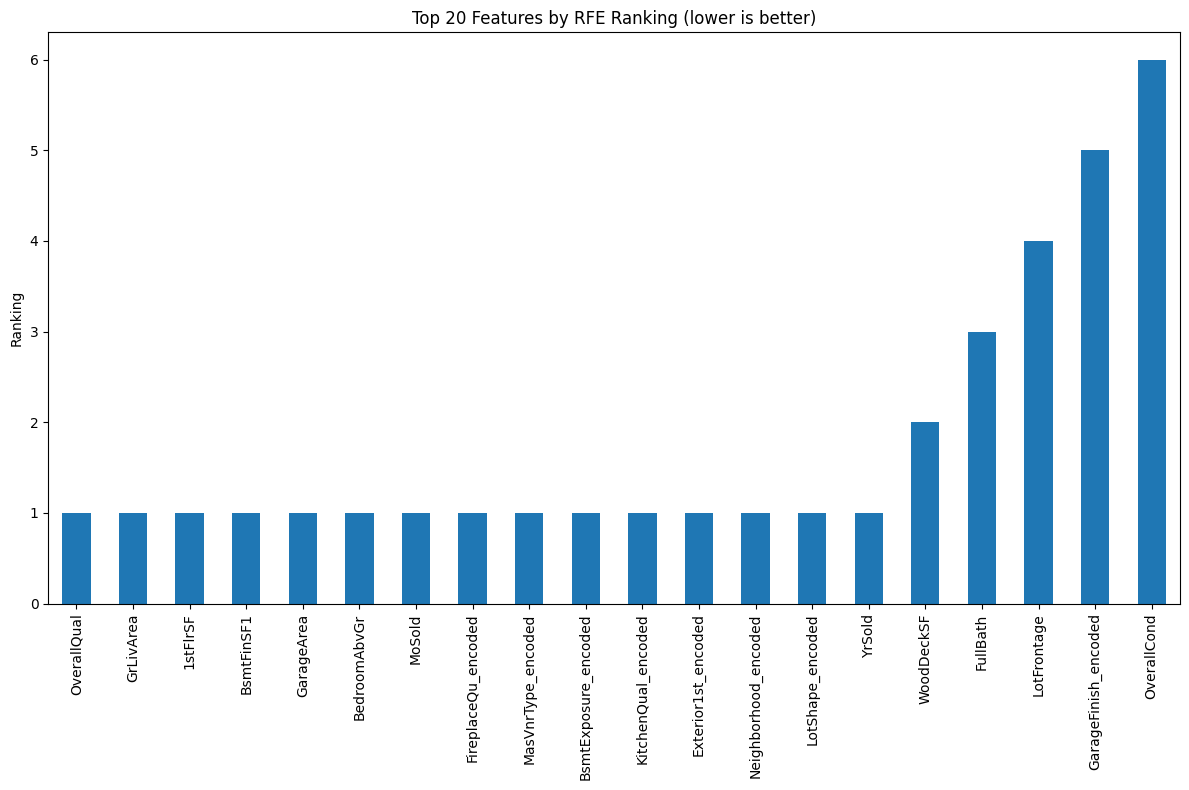

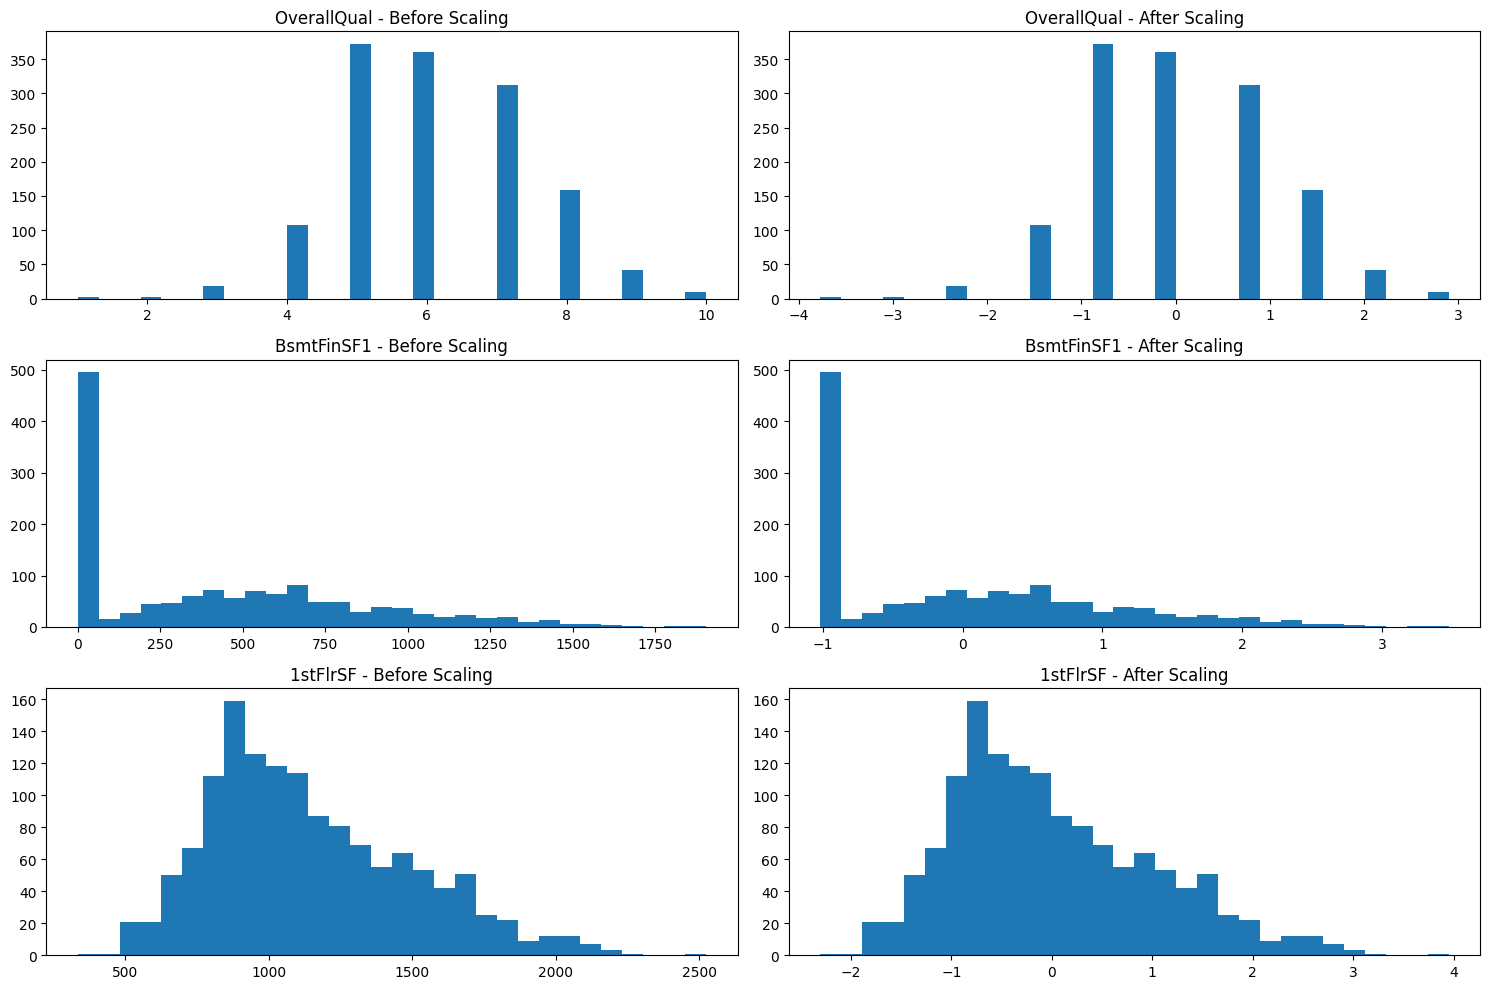

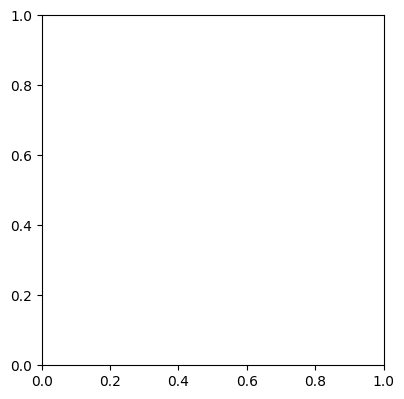

In [45]:

plt.figure(figsize=(15, 10))
for i, feature in enumerate(rfe_selected_features[:5], 1):  # Plot top 5 features
    plt.subplot(2, 3, i)
    plt.hist(X_train_scaled[feature][y_train==0], alpha=0.5, label='Class 0')
    plt.hist(X_train_scaled[feature][y_train==1], alpha=0.5, label='Class 1')
    plt.title(f'Distribution of {feature} (Scaled)')
    plt.legend()
plt.tight_layout()

# Save and log the distribution plot
plt.savefig("feature_distributions.png")
mlflow.log_artifact("feature_distributions.png")

# Log the RFE selector for future reference
mlflow.sklearn.log_model(rfe, "rfe_selector")
mlflow.sklearn.log_model(scaler, "standard_scaler")

# End the MLflow run
mlflow.end_run()

# Show plots if in interactive mode
plt.show()

In [49]:
mlflow.end_run()

🏃 View run logistic_regression_rfe_with_scaling at: https://dagshub.com/arazm21/ML-homework_1.mlflow/#/experiments/0/runs/9006dbe22c964c57ae013fe593f4e1e7
🧪 View experiment at: https://dagshub.com/arazm21/ML-homework_1.mlflow/#/experiments/0
